<a href="https://colab.research.google.com/github/pickachu17/PortfolioProjects/blob/main/cohortanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

In [12]:
path = "/content/drive/MyDrive/cohorts.csv"

In [16]:
data = pd.read_csv(path)

In [17]:
print(data.head())

         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


In [18]:
missing_values = data.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


In [19]:
data_types = data.dtypes
print(data_types)

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object


# Convert 'Date column to datetime format'

In [24]:
pd.to_datetime("20/01/2023", format="%d/%m/%Y")

Timestamp('2023-01-20 00:00:00')

#display The descriptive statistics of the dataset

In [25]:
descriptrive_stats = data.describe()
print(descriptrive_stats)

         New users  Returning users  Duration Day 1  Duration Day 7
count    30.000000        30.000000       30.000000       30.000000
mean   3418.166667      1352.866667      208.259594      136.037157
std     677.407486       246.793189       64.730830       96.624319
min    1929.000000       784.000000       59.047619        0.000000
25%    3069.000000      1131.500000      182.974287       68.488971
50%    3514.500000      1388.000000      206.356554      146.381667
75%    3829.500000      1543.750000      230.671046      220.021875
max    4790.000000      1766.000000      445.872340      304.350000


# New Section

In [26]:
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.templates.default = "plotly_white"

# Trend analysis for New and Returning Users
fig = go.Figure()

# New Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['New users'], mode='lines+markers', name='New Users'))

# Returning Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['Returning users'], mode='lines+markers', name='Returning Users'))

# Update layout
fig.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')

fig.show()

In [27]:
fig = px.line(data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show()

<ipython-input-28-1643a5d8a2f8>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



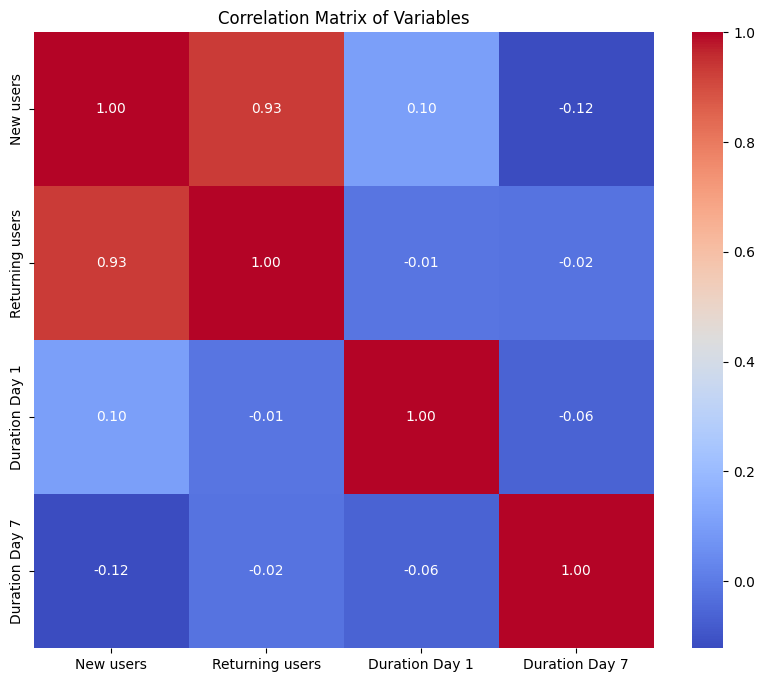

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

In [32]:
import pandas as pd

# Assuming 'Date' is in string format, convert it to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Now you can use the .dt accessor
data['Week'] = data['Date'].dt.isocalendar().week

# Continue with your code for weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    # Other columns and aggregations as needed
})


<ipython-input-32-9ecde1d6c14f>:4: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [33]:
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

print(weekly_averages.head())

   Week  New users  Returning users  Duration Day 1  Duration Day 7
0     2     3568.0           1538.0      154.312925      180.655172
1     6     3871.0           1540.0      188.531250      223.137931
2    10     3772.0           1545.0      189.689394       81.705882
3    15     2716.0           1126.0      200.044643      169.000000
4    19     2907.0           1148.0      166.305556       92.200000


In [34]:
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()

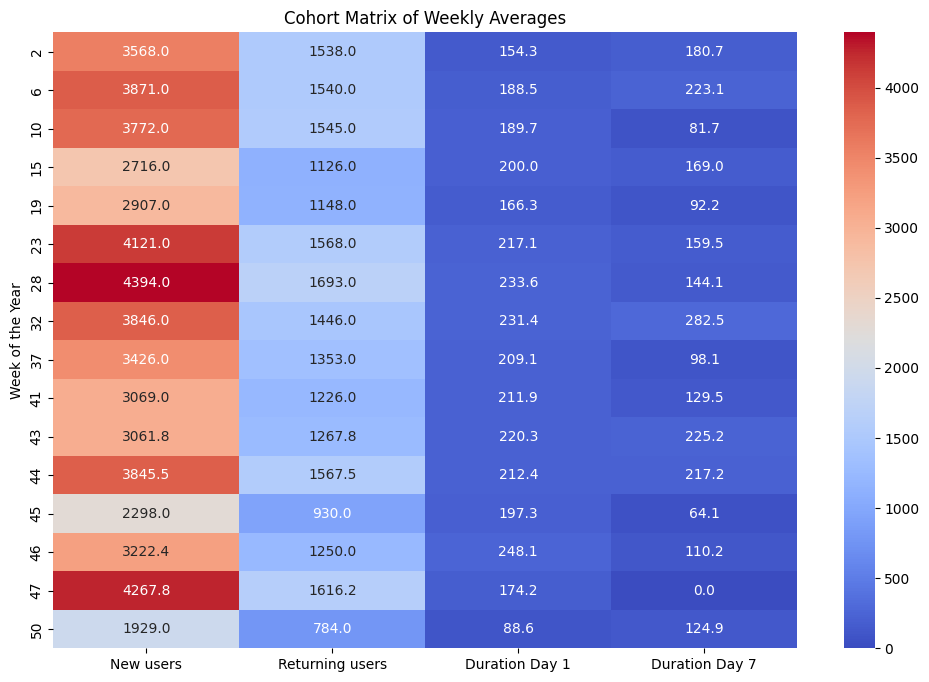

In [35]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()